In [ ]:
from __future__ import print_function
import os
import matplotlib.pyplot as plt
import numpy as np
import sys
import tarfile

from IPython.display import display, Image
from scipy import ndimage
from six.moves.urllib.request import urlretrieve
from six.moves import cPickle as pickle
from six.moves import range

def load_data(folder):
    datasets ={}
    result = [os.path.join(dp, f) for dp, dn, filenames in os.walk(folder) for f in filenames]
    for file_path in result:
        data = open(file_path)
        dat = data.read()
        lst = dat.splitlines()
        datasets[file_path[8:]] = lst
    return datasets

data = load_data('../data')

W poniżej wykorzystanym pliku są wektory miary tf-idf: https://pl.wikipedia.org/wiki/TFIDF

In [26]:
tfidfVecs = data['by-words-9cat-po_slowach-lista-simple-20120104']
articles = {}
for rawTfidf in tfidfVecs:
    article = rawTfidf.split("#")
    tfidf = map(lambda x: x.split("-") , article[1].split(" "))
    articles[int(article[0])] = dict(tfidf) #dla kazdego artykulu slownik id_slowa->waga
    
print(len(articles))

350


In [93]:
from decimal import Decimal
import math
def similarity(a,b):
    dotProduct = 0.0
    magnitude1 = 0.0
    magnitude2 = 0.0
    cosineSimilarity = 0.0
    
    for k in a:
        if k in b :
            dotProduct = dotProduct + (float(a[k]) * float(b[k]))
            magnitude1 = magnitude1 + (float(a[k]) ** 2)
            magnitude2 = magnitude2 + (float(b[k]) ** 2)
            
    magnitude1 = math.sqrt(magnitude1)
    magnitude2 = math.sqrt(magnitude2)
    if (magnitude1 != 0.0) | (magnitude2 != 0.0):
        return dotProduct / (magnitude1 * magnitude2)
    else:
        return 0.0;
            
similaritiesMatrix = {}
for k in articles:
    for j in articles:
        if k == j:
            continue
        else:
            similaritiesMatrix[str(k) + '-' + str(j)] = similarity(articles[k], articles[j])

from scipy.sparse import csr_matrix

indxs = []
for key, value in articles.iteritems():
    indxs.append(key)
    
distanceMatrix = np.zeros(shape=(len(indxs),len(indxs)))

for idxk,k in enumerate(indxs):
    for idxj,j in enumerate(indxs):
        if k == j:
            continue
        else:
            distanceMatrix[idxk,idxj] = 1-similarity(articles[k], articles[j])
            
print(distanceMatrix.size)

122500


In [116]:
print(distanceMatrix)
print('---------------------')
import sklearn
distanceMatrixNorm = sklearn.preprocessing.normalize(distanceMatrix)
print(distanceMatrixNorm)

[[  0.00000000e+00   1.11191568e-17   2.33038256e-02 ...,   0.00000000e+00
    0.00000000e+00   4.86086858e-03]
 [  2.00914647e-17   0.00000000e+00   3.77333742e-02 ...,   1.68829951e-02
    1.00477125e-02   0.00000000e+00]
 [  3.85949596e-02   3.45851184e-02   0.00000000e+00 ...,   3.19606822e-03
    3.86775349e-02   0.00000000e+00]
 ..., 
 [  0.00000000e+00   1.33003415e-02   2.74704463e-03 ...,   0.00000000e+00
    6.00088737e-02   3.62987308e-02]
 [  0.00000000e+00   7.54626023e-03   3.16927366e-02 ...,   5.72093161e-02
    0.00000000e+00   2.38897332e-02]
 [  5.80086792e-03   0.00000000e+00   0.00000000e+00 ...,   3.04310890e-02
    2.10080660e-02   0.00000000e+00]]
---------------------
[[  0.00000000e+00   1.11191568e-17   2.33038256e-02 ...,   0.00000000e+00
    0.00000000e+00   4.86086858e-03]
 [  2.00914647e-17   0.00000000e+00   3.77333742e-02 ...,   1.68829951e-02
    1.00477125e-02   0.00000000e+00]
 [  3.85949596e-02   3.45851184e-02   0.00000000e+00 ...,   3.19606822e-03

In [153]:
import numpy as np

from sklearn.cluster import DBSCAN
from sklearn.cluster import AgglomerativeClustering
from sklearn import metrics
db = DBSCAN(eps=0.1, min_samples=3, metric='precomputed', leaf_size = 5).fit(distanceMatrixNorm)
labels = db.labels_

print(labels)
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
print('Estimated number of clusters: %d' % n_clusters_)

AggClusterDistObj=AgglomerativeClustering(n_clusters=20,linkage='average',affinity="precomputed") 
labels=AggClusterDistObj.fit_predict(distanceMatrixNorm)

print(labels)
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
print('Estimated number of clusters: %d' % n_clusters_)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Estimated number of clusters: 1
[ 1  1  0  0  0  0  4  0  0  0  1  3  2  0  0  0  7  0  0  0  0  7  0  0  0
  1  3  0  0  0  0  1  0  0  0  0  0  0  0  3  0  0 16  0  3  4  5  0  0 11
  0  3  0  0  0  0  0  0 10  8  0  0  0  3  0  0  0  0  0  4  2 13  0 14  1
  2  0  0  0  7  3  0  1  8 1

[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  T

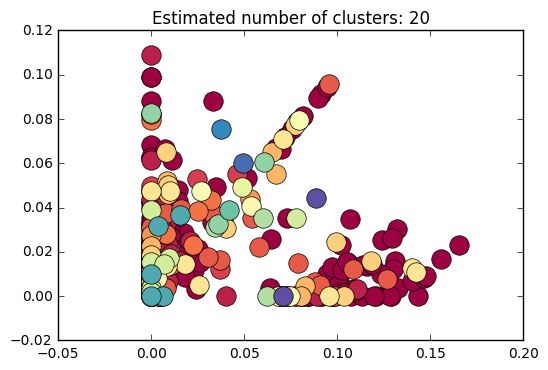

In [155]:
import matplotlib.pyplot as plt

unique_labels = set(labels)
colors = plt.cm.Spectral(np.linspace(0, 1, len(unique_labels)))
for k, col in zip(unique_labels, colors):
    if k == -1:
        col = 'k'

    class_member_mask = (labels == k)
    xy = distanceMatrixNorm[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col,
             markeredgecolor='k', markersize=14)

    xy = distanceMatrix[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col,
             markeredgecolor='k', markersize=6)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

In [146]:
def getLabels():
    rawLabels = map(lambda x: x.split("\t"), data['by-words-9cat-po_slowach-articles_dict-simple-20120104'])
    labels = dict(map(lambda (x,y): [y,x], rawLabels))
    return labels

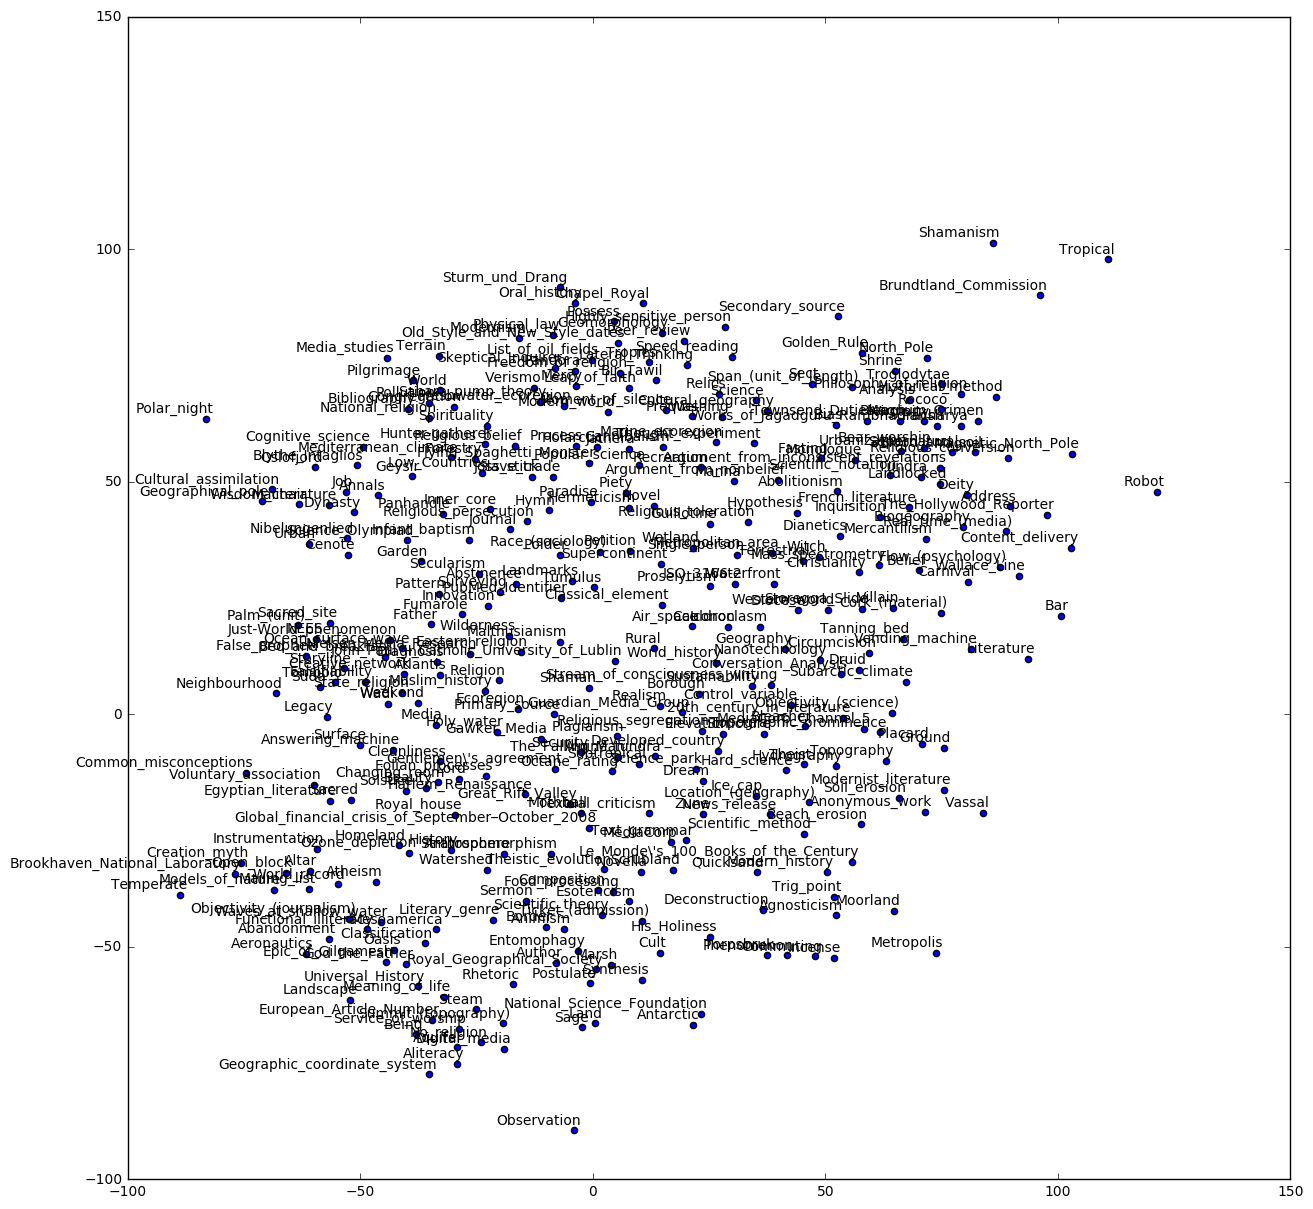

In [151]:
from sklearn.manifold import TSNE
from matplotlib import pylab

num_points = 350

tsne = TSNE(perplexity=10, n_components=2, init='pca', n_iter=5000)
two_d_embeddings = tsne.fit_transform(distanceMatrixNorm)

%matplotlib inline  
def plot(embeddings, labels):
    pylab.figure(figsize=(15,15))
    for i, label in enumerate(labels):
        x, y = embeddings[i,:]
        pylab.scatter(x, y)
        l = unicode(labels[label], 'utf-8')
        pylab.annotate(l, xy=(x, y), xytext=(5, 2), textcoords='offset points',
                       ha='right', va='bottom')
    pylab.show()
plot(two_d_embeddings, getLabels())